In [1]:
#importing libraries and packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#importing dataset:
dataset = pd.read_csv('AB_NYC_2019.csv')


In [13]:
#heatmap for manhattan
import folium
from folium.plugins import HeatMap
map=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(dataset[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map)
display(map)


In [15]:
#first five observations:
first_five = dataset.head()
first_five

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [20]:
#number of rows and columns
rows_columns = dataset.shape
rows_columns


(48895, 16)

In [21]:
#column values:

column_values = dataset.columns.values
print(column_values)


['id' 'name' 'host_id' 'host_name' 'neighbourhood_group' 'neighbourhood'
 'latitude' 'longitude' 'room_type' 'price' 'minimum_nights'
 'number_of_reviews' 'last_review' 'reviews_per_month'
 'calculated_host_listings_count' 'availability_365']


In [22]:
#Checking datatype of the dataset:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [23]:
#check if there are null values:
np.sum(dataset.isna())


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [24]:
#neighbourhood_group
dataset.neighbourhood_group.unique()


array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [25]:
#neighbourhood
dataset.neighbourhood.unique()


array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [27]:
#Finding the correlation between features
correlation = dataset.corr()
correlation

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


In [28]:
#Note:
#positive values indicates positive relationship(if x increases y increases)
#negative values indicates negative relationship(if x increases y decreases)


In [30]:
#to get the deatils like number of observations, min, max. 25%, 50%, 75%, mean, std
describe = dataset.describe()
describe

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [31]:
#Observations:
# 1. There is 50% chance that room will be available for 45 days
# 2. average price of the room is $153
# 3. There are average 7 listings of aprtments/houses
# 4. Average number of nights spend is 7
# 5. There is a 75% chance that the customer will spend minimum 5 nights


In [32]:
##############################EDA##############################################


In [33]:
####Univariate analysis###

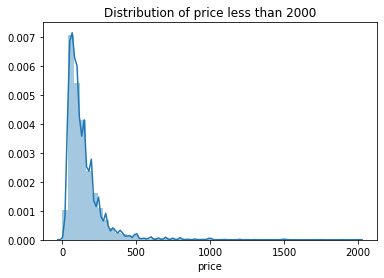

In [34]:
# 1. Distribution of price less than 2000

sns.distplot(dataset[dataset.price < 2000].price)
plt.title("Distribution of price less than 2000")
plt.show()


In [35]:
#obervation:
#most price is ranged between $10-$200


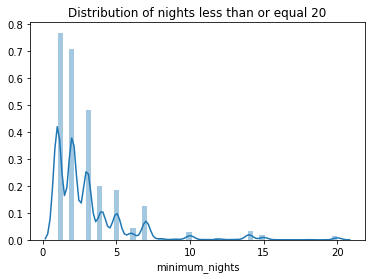

In [36]:
# 2. Customer spends nights less than <=20
sns.distplot(dataset[dataset.minimum_nights <= 20].minimum_nights)
plt.title("Distribution of nights less than or equal 20")
plt.show()


In [37]:
#obervation:
#most of the customers spend nights between 2-7 days


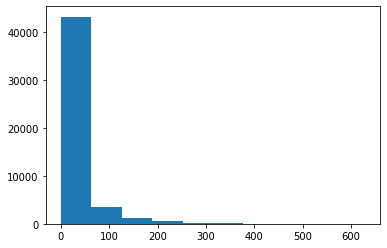

In [38]:
# 3. Histogram and distribution for number of reviews
plt.hist(dataset.number_of_reviews)
plt.show()


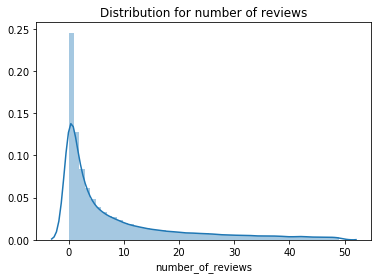

In [39]:
sns.distplot(dataset[dataset.number_of_reviews < 50].number_of_reviews)
plt.title("Distribution for number of reviews")
plt.show()


In [40]:
###number of listing are more than number of reviews

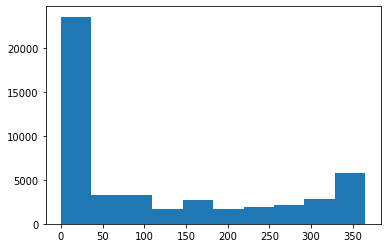

In [41]:
# 4. Histogram and distribution for availability 365

plt.hist(dataset.availability_365)
plt.show()


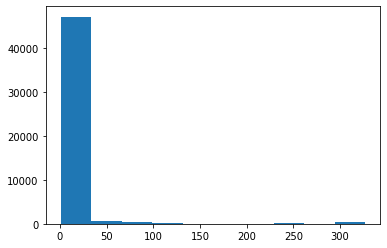

In [42]:
plt.hist(dataset.calculated_host_listings_count)
plt.show()


In [43]:
#Observations:
# Looking at the histogram of availability_365 and comparing with histogram of host listings we can
# infer that number of listings are smaller compare to availability days (0<50)


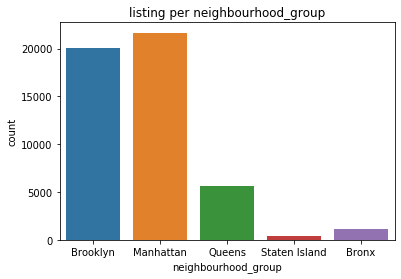

In [44]:
# 5. Checking number of listing per neighbourhood group

sns.countplot(dataset.neighbourhood_group)
plt.title("listing per neighbourhood_group")
plt.xlabel("neighbourhood_group")
plt.ylabel("count")
plt.show()


In [46]:
#observations:
##As we can see from the bar chart of neighbourhood_group manhattan has most number of listing
## and staten island has less number of listing

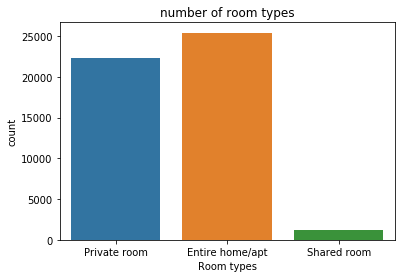

In [47]:
# 6. plotting number of room types count  on bar chart
sns.countplot(dataset.room_type)
plt.title("number of room types")
plt.xlabel("Room types")
plt.ylabel("count")
plt.show()


In [48]:
#Observations:
## as we can see entire home/apt has more number of listing and shared room has
## less number of listings


In [50]:
###Bi-variate analysis###

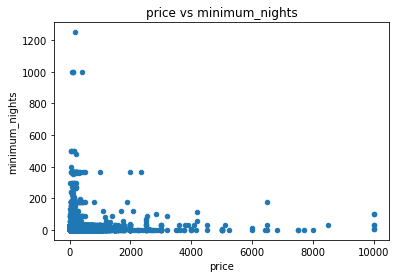

In [51]:
#scatter plot for price vs minimum_nights
dataset.plot(kind='scatter', x = 'price', y='minimum_nights')
plt.title('price vs minimum_nights')
plt.show()


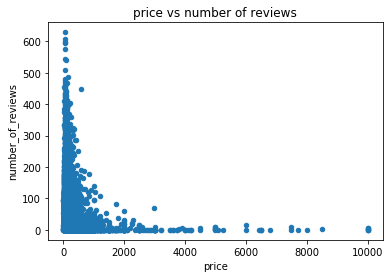

In [52]:
#scatter plot for price vs number of reviews
dataset.plot(kind='scatter', x = 'price', y='number_of_reviews')
plt.title('price vs number of reviews')
plt.show()


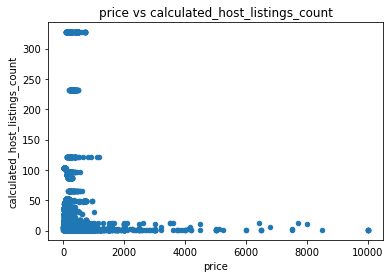

In [53]:
#scatter plot for price vs calculated_host_listings_count
dataset.plot(kind='scatter', x = 'price', y='calculated_host_listings_count')
plt.title('price vs calculated_host_listings_count')
plt.show()


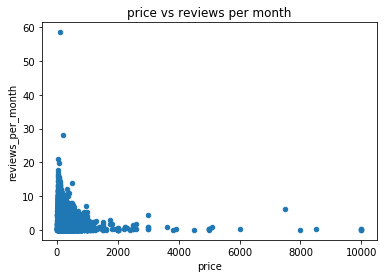

In [54]:
#scatter plot for price vs reviews per month
dataset.plot(kind='scatter', x = 'price', y='reviews_per_month')
plt.title('price vs reviews per month')
plt.show()


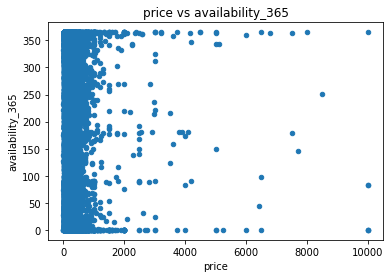

In [55]:
#scatter plot for price vs availability 365
dataset.plot(kind='scatter', x = 'price', y='availability_365')
plt.title('price vs availability_365')
plt.show()


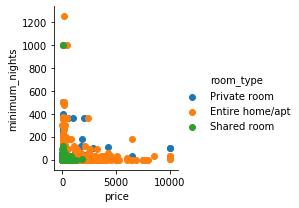

In [56]:
#scatter plot for room type according to price and minimum nights
sns.FacetGrid(dataset, hue="room_type").map(plt.scatter, 'price', 'minimum_nights').add_legend()


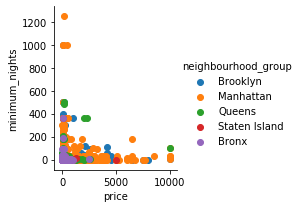

In [57]:
#scatter plot for neighbourhood group according to price and minimum nights
sns.FacetGrid(dataset, hue="neighbourhood_group").map(plt.scatter, 'price', 'minimum_nights').add_legend()


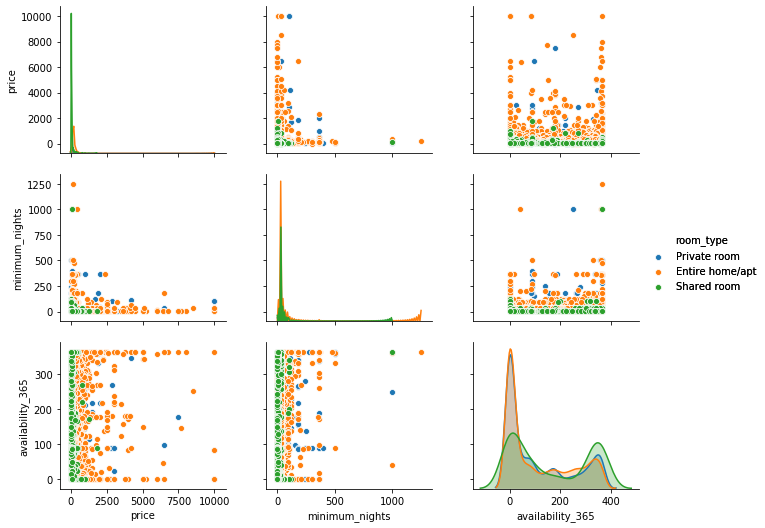

In [58]:
#pairwise scatter plot for room_type according to price, minimum_nights, availability_365
sns.pairplot(dataset, hue="room_type", vars=['price', 'minimum_nights', 'availability_365']).add_legend()


In [60]:
#Observations:
##price of entire home/apt is greater than other room types

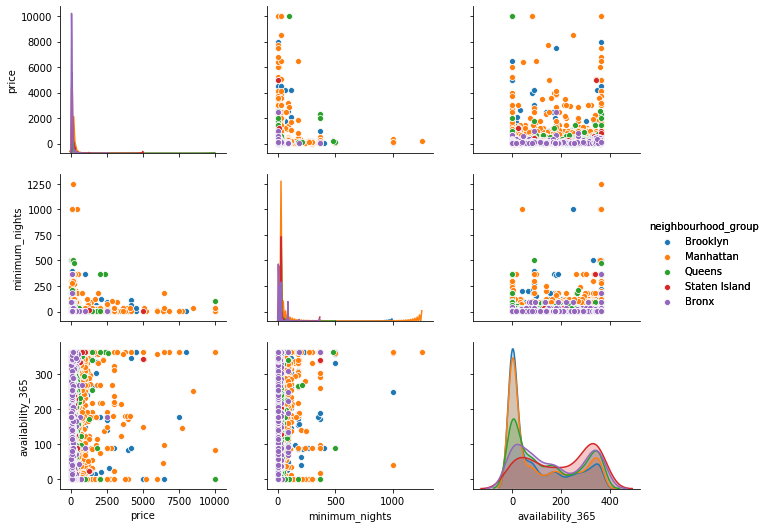

In [61]:
#pairwise scatter plot for neighbourhood_group according to price, minimum_nights, availability_365
sns.pairplot(dataset, hue="neighbourhood_group", vars=['price', 'minimum_nights', 'availability_365']).add_legend()


In [62]:
#observations:
# 1. Minimum nights spend in queens is more
# 2. bronx has minimum nights spend less compared to others
# 3. brooklyn has more availability of rooms and staten island has less number of availability of rooms


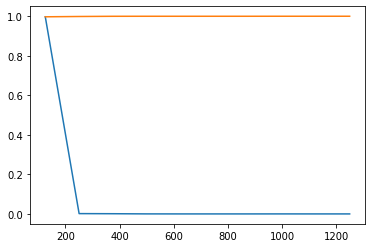

30.0


In [63]:
counts,bin_edges=np.histogram(dataset['minimum_nights'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()
print(np.percentile(dataset['minimum_nights'],95))
#95% of minimum nights spend are less than 30 days


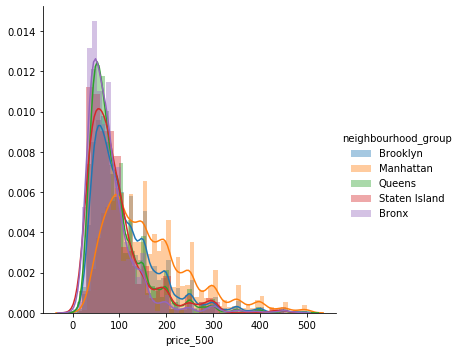

In [65]:
dataset['price_500']=dataset[dataset.price<500].price
sns.FacetGrid(dataset,hue='neighbourhood_group',height=5).map(sns.distplot,'price_500').add_legend()
plt.show()


In [66]:
#Observation:
##Price of rooms are more in manhattan and brooklyn compared to others


In [68]:
##############################Data Pre Processing##############################################

In [69]:
#From above exploratory data analysis it is confirmed that last_review,neighbourhood,reviews_per_month
#does not have any effect on price
drop_cols = ['name','host_name','id','host_id','latitude','longitude','last_review','neighbourhood','reviews_per_month']
dataset = dataset.drop(drop_cols, axis = 1)


In [71]:
head = dataset.head()

In [72]:
x = dataset[['neighbourhood_group', 'room_type','minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'price_500']]
y = dataset['price']


In [73]:
# splitting the dataset in training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [74]:
#Encoding the categorical values
#1: For neighbourhood_group
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb__train_binarizer_neighbourhood_group = lb.fit_transform(x_train['neighbourhood_group'])
lb_test_binarizer_neighbourhood_group = lb.transform(x_test['neighbourhood_group'])

lb__train_binarizer_neighbourhood_group = pd.DataFrame(lb__train_binarizer_neighbourhood_group, columns = lb.classes_)
lb_test_binarizer_neighbourhood_group = pd.DataFrame(lb_test_binarizer_neighbourhood_group, columns = lb.classes_)

print("after vectorization")
print(lb__train_binarizer_neighbourhood_group.shape, y_train.shape)
print(lb_test_binarizer_neighbourhood_group.shape, y_test.shape)


after vectorization
(39116, 5) (39116,)
(9779, 5) (9779,)


In [75]:
#2: For room_type
lb_train_binarizer_room_type = lb.fit_transform(x_train['room_type'])
lb_test_binarizer_room_type = lb.transform(x_test['room_type'])

lb_train_binarizer_room_type = pd.DataFrame(lb_train_binarizer_room_type, columns = lb.classes_)
lb_test_binarizer_room_type = pd.DataFrame(lb_test_binarizer_room_type, columns = lb.classes_)

print("after vectorization")
print(lb_train_binarizer_room_type.shape, y_train.shape)
print(lb_test_binarizer_room_type.shape, y_test.shape)


after vectorization
(39116, 3) (39116,)
(9779, 3) (9779,)


In [77]:
#Feature scaling

In [81]:
#1: For availability_365
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler(with_mean = False)
standard_scaler.fit(x_train['availability_365'].values.reshape(-1,1))

x_train_standard_scaler_av = standard_scaler.transform(x_train['availability_365'].values.reshape(-1,1))
x_test_standard_scaler_av = standard_scaler.transform(x_test['availability_365'].values.reshape(-1,1))
print("After applying standard scaler")
print(x_train_standard_scaler_av.shape, y_train.shape)
print(x_test_standard_scaler_av.shape, y_test.shape)



After applying standard scaler
(39116, 1) (39116,)
(9779, 1) (9779,)


In [82]:
#2: For calculated_host_listings_count
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler(with_mean = False)

standard_scaler.fit(x_train['calculated_host_listings_count'].values.reshape(-1,1))

x_train_standard_scaler_hl = standard_scaler.transform(x_train['calculated_host_listings_count'].values.reshape(-1,1))
x_test_standard_scaler_hl = standard_scaler.transform(x_test['calculated_host_listings_count'].values.reshape(-1,1))

print("after applying standard scaler")
print(x_train_standard_scaler_hl.shape, y_train.shape)
print(x_test_standard_scaler_hl.shape, y_test.shape)


after applying standard scaler
(39116, 1) (39116,)
(9779, 1) (9779,)


In [83]:
#3: For number of reviews
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler(with_mean = False)

standard_scaler.fit(x_train['number_of_reviews'].values.reshape(-1,1))

x_train_standard_scaler_nr = standard_scaler.transform(x_train['number_of_reviews'].values.reshape(-1,1))
x_test_standard_scaler_nr = standard_scaler.transform(x_test['number_of_reviews'].values.reshape(-1,1))

print("after applying standard scaler")
print(x_train_standard_scaler_nr.shape, y_train.shape)
print(x_test_standard_scaler_nr.shape, y_test.shape)


after applying standard scaler
(39116, 1) (39116,)
(9779, 1) (9779,)


In [84]:
#4: For minimum nights
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler(with_mean = False)

standard_scaler.fit(x_train['minimum_nights'].values.reshape(-1,1))

x_train_standard_scaler_mn = standard_scaler.transform(x_train['minimum_nights'].values.reshape(-1,1))
x_test_standard_scaler_mn = standard_scaler.transform(x_test['minimum_nights'].values.reshape(-1,1))

print("after applying standard scaler")
print(x_train_standard_scaler_mn.shape, y_train.shape)
print(x_test_standard_scaler_mn.shape, y_test.shape)


after applying standard scaler
(39116, 1) (39116,)
(9779, 1) (9779,)


In [87]:
#Concatinating features

In [88]:
## merging two sparse
from scipy.sparse import hstack

x_tr = hstack((lb__train_binarizer_neighbourhood_group,lb_train_binarizer_room_type,x_train_standard_scaler_av, x_train_standard_scaler_hl, x_train_standard_scaler_nr, x_train_standard_scaler_mn)).tocsr()

x_te = hstack((lb_test_binarizer_neighbourhood_group, lb_test_binarizer_room_type, x_test_standard_scaler_av, x_test_standard_scaler_hl, x_test_standard_scaler_nr, x_test_standard_scaler_mn)).tocsr()

print("Final matrix of data")
print(x_tr.shape, y_train.shape)
print(x_te.shape, y_test.shape)


Final matrix of data
(39116, 12) (39116,)
(9779, 12) (9779,)


In [89]:
# fitting the  simple linear regression model into the training set 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_tr, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
#Model Performance:
from sklearn.metrics import mean_squared_error, r2_score
y_train_pred = regressor.predict(x_tr)
root_mean_sqaure_error = (np.sqrt(mean_squared_error(y_train,y_train_pred)))
rsquared = r2_score(y_train, y_train_pred)  
print("Model performance for train set... ")
print(rsquared*100) 


Model performance for train set... 
8.942671508035794


In [91]:
y_test_pred = regressor.predict(x_te)
root_mean_sqaure_error = (np.sqrt(mean_squared_error(y_test,y_test_pred)))
rsquared = r2_score(y_test, y_test_pred)  
print("Model performance for test set... ")
print(rsquared*100) 


Model performance for test set... 
10.641607295019572


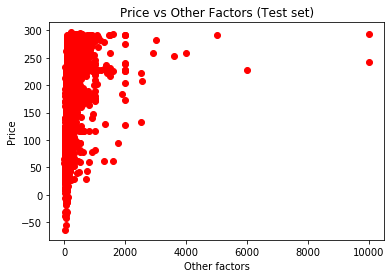

In [92]:
# visualizing the test set results
plt.scatter(y_test, y_test_pred, color = 'red')
#plt.plot(y_test,  regressor.predict(y_pred), color = 'blue')
plt.title('Price vs Other Factors (Test set)')
plt.xlabel('Other factors')
plt.ylabel('Price')
plt.show()
